In [1]:
import sys
sys.path.insert(0, "../")

In [2]:
import nsp
import numpy as np
import torch
import utils
import utils.optm as optm
import utils.lossfunc as lf
from importlib import reload

reload(nsp)

<module 'nsp' from '/home/user/project/python/nsp/test/../nsp/__init__.py'>

In [3]:
# %%time
# for _ in range(1):
x = np.random.randn(16,16)
x = (x+x.T)/2
x=torch.tensor(x)
loss_l1 = nsp.loss.l1(x, [4, 4])
loss_l2 = nsp.loss.l2(x, [4, 4])
loss_mes = nsp.loss.mes(x, [4, 4])

In [4]:
np.diag(np.random.randn(16,16))

array([ 1.29615523, -0.31745613,  1.91628426,  0.5448972 ,  0.46033487,
       -0.20098678,  0.49981663,  0.28282329, -0.07478547, -0.30681803,
        0.39606861,  0.05203934, -1.18104813,  0.07358148,  0.69460932,
        1.46379999])

In [5]:
model = nsp.model.UnitaryRiemanGenerator(4, dtype=np.float64)


In [32]:
from nsp.optim import RiemanSGD
from matplotlib import pyplot as plt

model2 = nsp.model.UnitaryRiemanGenerator(4, dtype=torch.float64)
sgd = RiemanSGD(model2, 0.01)
loss_old = loss_l1(model2.matrix()).item()
loss_l1(model2.matrix()).backward()
S, U = sgd._riemannian_grad(model2._params)
# t_list = np.linspace(0, 0.01, 1000)
res = []
for t in range(10000):
    model2 = nsp.model.UnitaryRiemanGenerator(4, dtype=torch.float64)
    sgd = RiemanSGD(model2, 0.001)
    loss_old = loss_l1(model2.matrix()).item()
    loss_l1(model2.matrix()).backward()
    sgd.step()
    loss_new = loss_l1(model2.matrix()).item()
    res.append((loss_new - loss_old))


# print(loss_new - loss_old)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


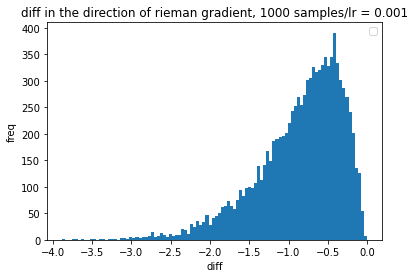

In [33]:
fig, ax = plt.subplots()
ax.hist(res, bins=100)
ax.set_title('diff in the direction of rieman gradient, 1000 samples/lr = 0.001')
ax.set_xlabel('diff')
ax.set_ylabel('freq')
ax.legend()
fig.show()
plt.savefig('rieman_grad_lr=0.001.jpg', dpi=400, bbox_inches="tight")

In [7]:
np.linspace(0, 0.001, 1000)

array([0.00000000e+00, 1.00100100e-06, 2.00200200e-06, 3.00300300e-06,
       4.00400400e-06, 5.00500501e-06, 6.00600601e-06, 7.00700701e-06,
       8.00800801e-06, 9.00900901e-06, 1.00100100e-05, 1.10110110e-05,
       1.20120120e-05, 1.30130130e-05, 1.40140140e-05, 1.50150150e-05,
       1.60160160e-05, 1.70170170e-05, 1.80180180e-05, 1.90190190e-05,
       2.00200200e-05, 2.10210210e-05, 2.20220220e-05, 2.30230230e-05,
       2.40240240e-05, 2.50250250e-05, 2.60260260e-05, 2.70270270e-05,
       2.80280280e-05, 2.90290290e-05, 3.00300300e-05, 3.10310310e-05,
       3.20320320e-05, 3.30330330e-05, 3.40340340e-05, 3.50350350e-05,
       3.60360360e-05, 3.70370370e-05, 3.80380380e-05, 3.90390390e-05,
       4.00400400e-05, 4.10410410e-05, 4.20420420e-05, 4.30430430e-05,
       4.40440440e-05, 4.50450450e-05, 4.60460460e-05, 4.70470470e-05,
       4.80480480e-05, 4.90490490e-05, 5.00500501e-05, 5.10510511e-05,
       5.20520521e-05, 5.30530531e-05, 5.40540541e-05, 5.50550551e-05,
      